# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [36]:
data = pd.read_csv("assignment3_creditcard.csv")

In [37]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [38]:
# Check for missing value
missing_value = data.isnull().sum()
missing_value

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Fit the Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute perform metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print("Acc:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)
print("AUROC:", roc_auc)

Acc: 0.9987796373779637
Precision: 1.0
Recall: 0.8541666666666666
f1: 0.9213483146067416
AUROC: 0.9270833333333333


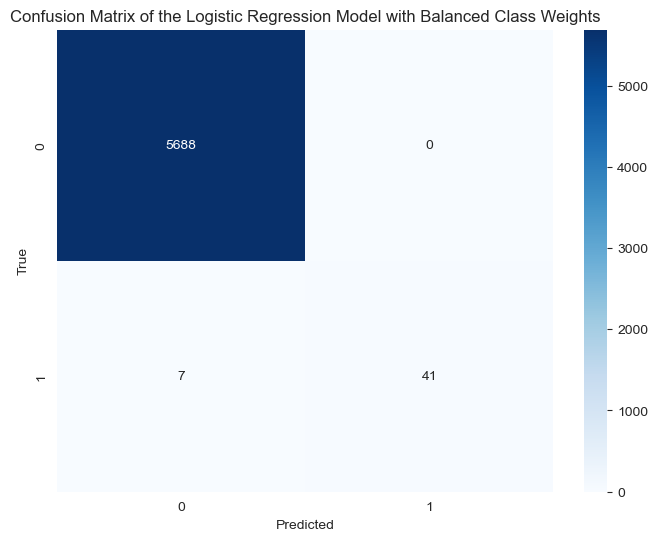

In [41]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Logistic Regression Model with Balanced Class Weights')
plt.show()

Confusion Matrix를 계산한 결과, TN, FP, FN, TP의 값은 각각 5688, 0, 7, 41이다.

아래를 통해 모델의 성능을 더 자세히 이해할 수 있다.

- True Negative(TN): 실제로 사기가 아닌 거래를 사기가 아닌 거래라고 정확하게 예측한 경우, 즉, 올바르게 분류된 정상 거래의 수

- False Positive(FP): 실제로는 사기가 아닌 거래를 사기 거래라고 잘못 예측한 경우, 즉, 잘못 분류된 정상 거래의 수

- False Negative(FN): 실제로 사기인 거래를 사기가 아닌 거래라고 잘못 예측한 경우, 즉, 놓친 사기 거래의 수

- True Positive(TP): 실제로 사기인 거래를 사기 거래라고 정확하게 예측한 경우, 즉, 올바르게 분류된 사기 거래의 수

신용 카드 사기 예측 문제의 경우, 사기를 제대로 예측하는 것이 중요하므로 재현율을 성능 지표로 삼아 성능 개선 진행
LogisticRegression의 인자값인 class_weight를 'balanced'로 설정하여 클래스의 빈도에 반비례 하도록 가중치를 적용하여 불균형 문제 해결

In [42]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_test_pred2)
precision2 = precision_score(y_test, y_test_pred2)
recall2 = recall_score(y_test, y_test_pred2)
f12 = f1_score(y_test, y_test_pred2)
roc_auc2 = roc_auc_score(y_test, y_test_pred2)

cm2 = confusion_matrix(y_test, y_test_pred2)
tn2, fp2, fn2, tp2 = cm2.ravel()

print("Acc:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("f1:", f12)
print("AUROC:", roc_auc2)

Acc: 0.9802998605299861
Precision: 0.2903225806451613
Recall: 0.9375
f1: 0.44334975369458135
AUROC: 0.9590805203938115


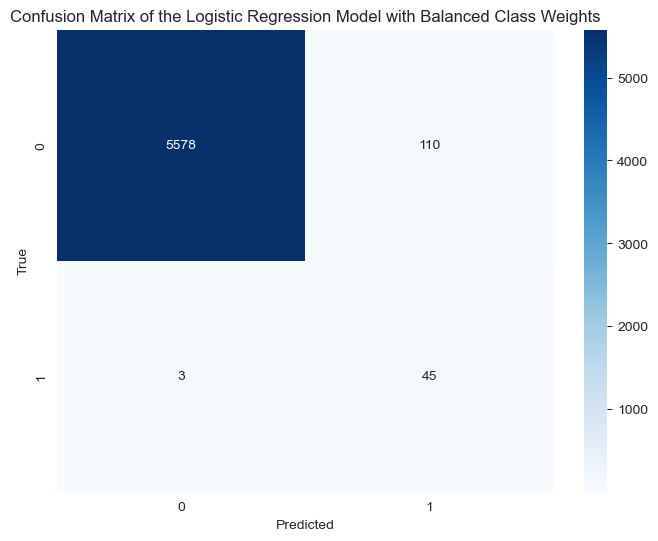

In [43]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Logistic Regression Model with Balanced Class Weights')
plt.show()

In [ ]:
"""
이 결과는 모델이 대체로 높은 성능을 보이고 있음을 나타낸다. 특히 재현율이 매우 높아졌으며, 이는 모델이 사기 거래를 더 잘 예측하고 있다는 것을 의미하며,
데이터의 불균형 문제를 해결하는 것이 재현율에 영향을 미쳤음을 알 수 있다. 그러나 정밀도가 매우 낮아졌다.
이는 모델이 많은 수의 정상 거래를 잘못 예측하고 있음을 나타낸다.

정밀도 하락의 요인은 다음과 같을 수 있다.
    1. 'balanced' 클래스 가중치를 사용하면 불균형한 클래스 중 작은 클래스에 더 많은 가중치를 부여하게 되어,
       더 큰 클래스(이 경우 '사기가 아닌 거래')의 일부를 잘못 분류할 가능성이 있다.
    2. 이로 인해 '사기가 아닌 거래'를 '사기 거래'로 잘못 예측하면서 False Positive가 증가하게 되고, 이로 인해 정밀도가 감소하게 된다.

그러나 재현율이 더 중요한 지표가 될 수 있다. 이는 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율을 나타내며, 이 경우 실제 '사기 거래' 중에서
얼마나 많은 거래를 '사기 거래'로 정확하게 예측했는지를 나타낸다.
"""